<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da08_gapminder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [gapminder.tsv](https://github.com/JakeOh/202511_BD53/raw/refs/heads/main/datasets/gapminder.tsv) 파일 데이터 분석

# 필요한 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


*   파일을 읽고 DataFrame 생성
*   국가 수
*   대륙 수
*   연도 수
*   기대수명 분석
    *   기대수명 최댓값, 최솟값 행
*   1인당 GDP 분석
    *   1인당 GDP 최댓값, 최솟값 행
*   인구수 분석
*   그룹별 통계량


In [2]:
file_path = 'https://github.com/JakeOh/202511_BD53/raw/refs/heads/main/datasets/gapminder.tsv'

In [5]:
df = pd.read_csv(file_path, sep='\t')

In [6]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [7]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


# 기술 통계량

In [17]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


# 국가 수

In [10]:
df.country.value_counts()

,count
country,
Afghanistan,12
Albania,12
Algeria,12
Angola,12
Argentina,12
...,...
Vietnam,12
West Bank and Gaza,12
"Yemen, Rep.",12


In [12]:
countries = df.country.unique()
countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [13]:
countries.size

142

# 대륙 수

In [14]:
df.continent.value_counts()

,count
continent,
Africa,624
Asia,396
Europe,360
Americas,300
Oceania,24


In [15]:
continents = df.continent.unique()
continents

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [16]:
continents.size

5

# 연도

In [18]:
years = df.year.unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [19]:
years.size

12

# 기대수명(lifeExp) 분석

In [22]:
df.lifeExp.describe()

,lifeExp
count,1704.000000
mean,59.474439
std,12.917107
min,23.599000
25%,48.198000
50%,60.712500
75%,70.845500
max,82.603000


In [20]:
df.lifeExp.max()  # 기대수명 최댓값

82.603

In [23]:
df[df.lifeExp == df.lifeExp.max()]

,country,continent,year,lifeExp,pop,gdpPercap
803,Japan,Asia,2007,82.603,127467972,31656.06806


In [21]:
df.lifeExp.min()  # 기대수명 최솟값

23.599

In [24]:
df[df.lifeExp == df.lifeExp.min()]

,country,continent,year,lifeExp,pop,gdpPercap
1292,Rwanda,Africa,1992,23.599,7290203,737.068595


## 일본 기대수명

In [25]:
japan_df = df[df.country == 'Japan']
japan_df

,country,continent,year,lifeExp,pop,gdpPercap
792,Japan,Asia,1952,63.030,86459025,3216.956347
793,Japan,Asia,1957,65.500,91563009,4317.694365
794,Japan,Asia,1962,68.730,95831757,6576.649461
795,Japan,Asia,1967,71.430,100825279,9847.788607
796,Japan,Asia,1972,73.420,107188273,14778.786360
797,Japan,Asia,1977,75.380,113872473,16610.377010
798,Japan,Asia,1982,77.110,118454974,19384.105710
799,Japan,Asia,1987,78.670,122091325,22375.941890
800,Japan,Asia,1992,79.360,124329269,26824.895110
801,Japan,Asia,1997,80.690,125956499,28816.584990


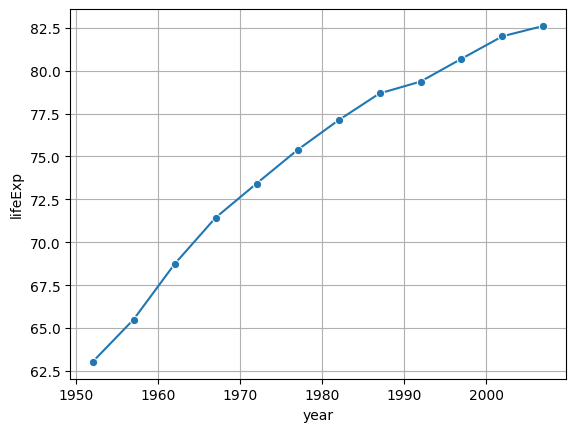

In [26]:
sns.lineplot(data=japan_df, x='year', y='lifeExp', marker='o')
plt.grid()
plt.show()

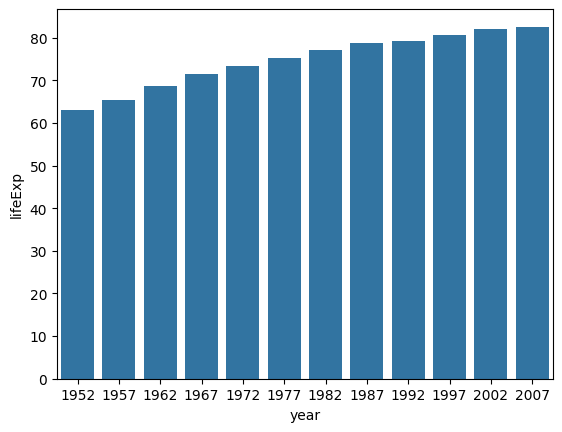

In [27]:
sns.barplot(data=japan_df, x='year', y='lifeExp', errorbar=None)
plt.show()

## 르완다 기대수명

In [28]:
rwanda_df = df[df.country == 'Rwanda']
rwanda_df

,country,continent,year,lifeExp,pop,gdpPercap
1284,Rwanda,Africa,1952,40.000,2534927,493.323875
1285,Rwanda,Africa,1957,41.500,2822082,540.289398
1286,Rwanda,Africa,1962,43.000,3051242,597.473073
1287,Rwanda,Africa,1967,44.100,3451079,510.963714
1288,Rwanda,Africa,1972,44.600,3992121,590.580664
1289,Rwanda,Africa,1977,45.000,4657072,670.080601
1290,Rwanda,Africa,1982,46.218,5507565,881.570647
1291,Rwanda,Africa,1987,44.020,6349365,847.991217
1292,Rwanda,Africa,1992,23.599,7290203,737.068595
1293,Rwanda,Africa,1997,36.087,7212583,589.944505


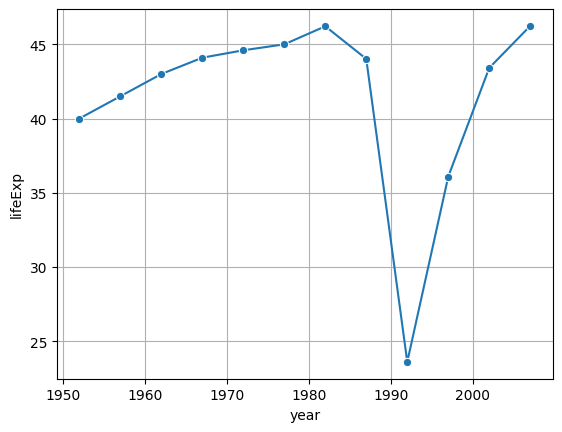

In [30]:
sns.lineplot(data=rwanda_df, x='year', y='lifeExp', marker='o')
plt.grid()
plt.show()

## 연도별 기대수명 평균값

In [31]:
df.groupby(by=['year']).lifeExp.mean()

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


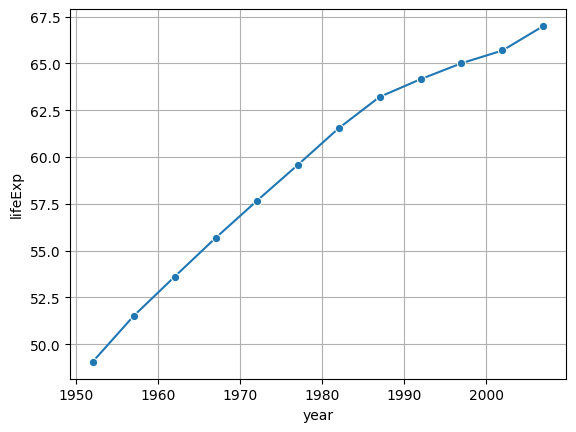

In [32]:
sns.lineplot(data=df, x='year', y='lifeExp', estimator='mean', marker='o', errorbar=None)
plt.grid()
plt.show()

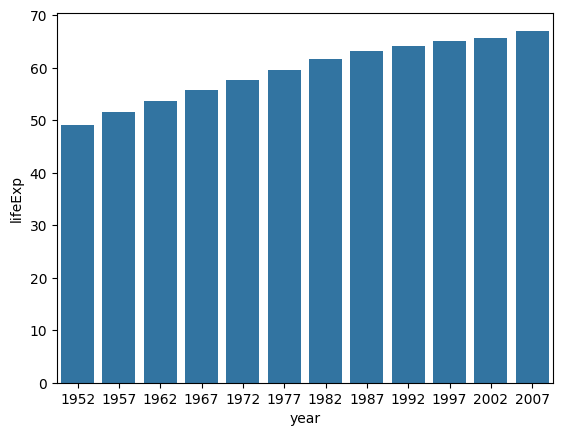

In [33]:
sns.barplot(data=df, x='year', y='lifeExp', estimator='mean', errorbar=None)
plt.show()

## 대륙별 연도별 기대수명

대륙별 기대수명 평균의 연도에 따른 변화

In [34]:
df.groupby(by=['continent', 'year']).lifeExp.mean()

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.020515
           2002    69.233879
           2007    70.728485
Europe     1952    64.408500
           1957    66.703067
           1962    68.539233
           1967    69.737600
           1972    70.775033
           1977    71.937767
           1982    72.806400
           1987    73.642167
           1992    74.440100
           1997    75.505167
           2002    76.700600
           2007    77.648600
Oceania    1952    69.255000
           1957    70.295000
           1962    71.085000
           1967    71.310000
           1972    71.910000
           1977    72.855000
           1982    74.290000
           1987    75.320000
           1992    76.945000
           1997    78.190000
           2002    79.740000
           2007    80.719500
Name: lifeExp, dtype: float64

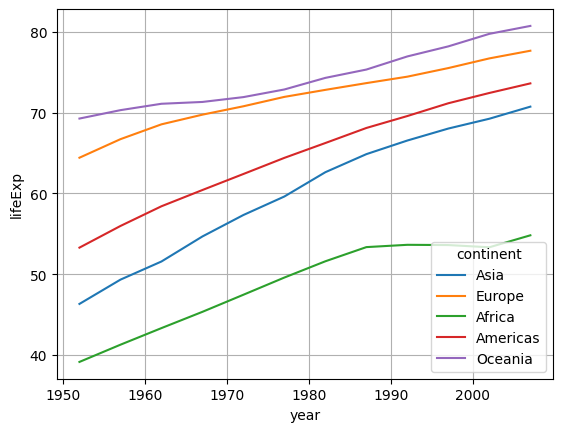

In [35]:
sns.lineplot(data=df, x='year', y='lifeExp', hue='continent', errorbar=None)
#> estimator='mean' 생략 가능
plt.grid()
plt.show()